## 1) Read csv

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import ast

In [55]:
movie_data = pd.read_csv('scraped_data.csv')

In [56]:
movie_data.head()

,title_type,rank,title,release_year,rating,votes,href_title,main_movie_page,genre,video_link
0,Movie,1.0,Nosferatu,2024,7.7,42000,https://www.imdb.com/title/tt5040012/?ref_=sr_t_1,https://www.imdb.com/video/vi1732429337/?playl...,"['Dark Fantasy', 'Supernatural Horror', 'Vampi...",https://imdb-video.media-imdb.com/vi1732429337...
1,Movie,2.0,Red One,2024,6.4,119000,https://www.imdb.com/title/tt14948432/?ref_=sr...,https://www.imdb.com/video/vi1537526041/?playl...,"['Holiday Comedy', 'Action', 'Adventure', 'Com...",https://imdb-video.media-imdb.com/vi1537526041...
2,Movie,3.0,Carry-On,2024,6.5,118000,https://www.imdb.com/title/tt21382296/?ref_=sr...,https://www.imdb.com/video/vi4172269849/?playl...,"['Action', 'Crime', 'Drama', 'Holiday', 'Myste...",https://imdb-video.media-imdb.com/vi4172269849...
3,Movie,4.0,Superman,2025,NaN,NaN,https://www.imdb.com/title/tt5950044/?ref_=sr_t_4,https://www.imdb.com/video/vi2009516313/?playl...,"['Superhero', 'Action', 'Adventure', 'Fantasy'...",https://imdb-video.media-imdb.com/vi2009516313...
4,Movie,5.0,Pushpa: The Rule - Part 2,2024,6.4,41000,https://www.imdb.com/title/tt16539454/?ref_=sr...,https://www.imdb.com/video/vi1721157913/?playl...,"['Action Epic', 'One-Person Army Action', 'Act...",https://imdb-video.media-imdb.com/vi1721157913...


In [57]:
movie_data.dtypes

title_type          object
rank               float64
title               object
release_year        object
rating             float64
votes               object
href_title          object
main_movie_page     object
genre               object
video_link          object
dtype: object

## 2) Preprocessing

In [58]:
import numpy as np
import ast # for safely evaluating string representations of list
import re

In [59]:
# Data Quality Check
print("Dataset Info:")
print(movie_data.info())

print("\nMissing Values: ")
print(movie_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_type       450 non-null    object 
 1   rank             450 non-null    float64
 2   title            448 non-null    object 
 3   release_year     450 non-null    object 
 4   rating           432 non-null    float64
 5   votes            432 non-null    object 
 6   href_title       450 non-null    object 
 7   main_movie_page  450 non-null    object 
 8   genre            450 non-null    object 
 9   video_link       268 non-null    object 
dtypes: float64(2), object(8)
memory usage: 35.3+ KB
None

Missing Values: 
title_type           0
rank                 0
title                2
release_year         0
rating              18
votes               18
href_title           0
main_movie_page      0
genre                0
video_link         182
dtype: int64


### Data Cleaning and Type Conversion

In [79]:
def clean_votes(vote_str):
    original_value = vote_str  # Store original value for debugging
    try:
        # Handle N/A cases
        if pd.isna(vote_str) or vote_str == 'N/A':
            return np.nan
            
        # Convert to string
        vote_str = str(vote_str).strip()
        
        # Handle M (million) cases
        if 'M' in vote_str:
            result = float(vote_str.replace('M', '')) * 1_000_000
            print(f"Converted {original_value} to {result}")
            return result
            
        # Handle cases like "1.4000" - these should be 1400
        if '.' in vote_str and vote_str.endswith('000'):
            # Remove the '000' suffix and convert remaining number
            base = float(vote_str.replace('000', ''))
            result = base * 1000
            print(f"Converted {original_value} to {result}")
            return result
        
        # Convert regular numbers
        result = float(vote_str)
        if result < 100:  # Let's flag suspiciously low values
            print(f"Warning: Very low vote count detected: {original_value} -> {result}")
        return result
        
    except Exception as e:
        print(f"Error processing value: {vote_str}, Error: {str(e)}")
        return np.nan

# Let's check the distribution of values by ranges
def analyze_vote_distribution(df):
    ranges = [
        (0, 100),
        (100, 1000),
        (1000, 10000),
        (10000, 100000),
        (100000, 1000000),
        (1000000, float('inf'))
    ]
    
    for start, end in ranges:
        count = len(df[(df['votes'] >= start) & (df['votes'] < end)])
        print(f"Votes between {start} and {end}: {count} movies")


In [120]:
# Create a copy of the dataframe
df_clean = movie_data.copy()

# Convert votes to numeric by using custom function clean_votes that handles multiple cases
df_clean['votes'] = df_clean['votes'].apply(clean_votes)

# Convert release_year to numeric
df_clean['release_year'] = pd.to_numeric(df_clean['release_year'], errors='coerce')


Converted  8.3000 to 8300.0
Converted  6.7000 to 6700.0
Converted  1.7M to 1700000.0
Converted  1.5000 to 1500.0
Converted  2.9000 to 2900.0
Converted  4.3000 to 4300.0
Converted  7.2000 to 7200.0
Converted  8.8000 to 8800.0
Converted  9.5000 to 9500.0
Converted  2.4M to 2400000.0
Converted  5.8000 to 5800.0
Converted  8.8000 to 8800.0
Converted  2.3M to 2300000.0
Converted  1.4000 to 1400.0
Converted  1.4M to 1400000.0
Converted  6.6000 to 6600.0
Converted  6.4000 to 6400.0
Converted  1.1M to 1100000.0
Converted  1.9000 to 1900.0
Converted  5.3000 to 5300.0
Converted  4.7000 to 4700.0
Converted  2.7000 to 2700.0
Converted  3.2000 to 3200.0
Converted  2.6000 to 2600.0
Converted  1.8000 to 1800.0
Converted  1.1000 to 1100.0
Converted  3.7000 to 3700.0
Converted  1.3000 to 1300.0
Converted  7.5000 to 7500.0
Converted  1.1000 to 1100.0
Converted  7.2000 to 7200.0
Converted  1.3000 to 1300.0
Converted  1.2000 to 1200.0
Converted  1.3000 to 1300.0
Converted  6.9000 to 6900.0
Converted  1.40

In [81]:
# Verify the conversion
print("\nSample of converted vote counts:")
print(df_clean[['title', 'votes']].head(10))

# Basic statistics of votes after conversion
print("\nVote count statistics:")
print(df_clean['votes'].describe())

# Check for any remaining issues
print("\nNumber of null values in votes:", df_clean['votes'].isnull().sum())


Sample of converted vote counts:
                                   title     votes
0                              Nosferatu   42000.0
1                                Red One  119000.0
2                               Carry-On  118000.0
3                               Superman       NaN
4              Pushpa: The Rule - Part 2   41000.0
5                   Sonic the Hedgehog 3   19000.0
6                  Mufasa: The Lion King   22000.0
7                          Love Actually  553000.0
8                           Gladiator II  151000.0
9  National Lampoon's Christmas Vacation  233000.0

Vote count statistics:
count    4.320000e+02
mean     7.373648e+04
std      2.338317e+05
min      6.000000e+00
25%      6.975000e+02
50%      4.200000e+03
75%      3.925000e+04
max      2.400000e+06
Name: votes, dtype: float64

Number of null values in votes: 18


In [82]:
# Verify the conversion worked correctly
print("Sample of potentially problematic values:")
# Let's check some specific cases that might have been wrong before
test_cases = ['1.4000', '8.3000', '5.3000', '2.4M', '42000']
for case in test_cases:
    print(f"{case} -> {clean_votes(case)}")

print("\nDistribution of votes by genre:")
# Show vote distribution statistics by genre to verify the fix
print(df_clean.groupby('title_type')['votes'].describe())

Sample of potentially problematic values:
Converted 1.4000 to 1400.0
1.4000 -> 1400.0
Converted 8.3000 to 8300.0
8.3000 -> 8300.0
Converted 5.3000 to 5300.0
5.3000 -> 5300.0
Converted 2.4M to 2400000.0
2.4M -> 2400000.0
42000 -> 42000.0

Distribution of votes by genre:
                count           mean            std     min       25%  \
title_type                                                              
Movie            49.0  186732.653061  298767.142735  1500.0  19000.00   
Short            49.0    8261.612245   15899.500305    20.0    438.00   
TV Episode       39.0     270.102564     346.403765     8.0     19.50   
TV Mini Series   48.0  109872.916667  179411.216464   132.0   6225.00   
TV Movie         50.0    8398.360000   13412.850758   265.0   1200.00   
TV Series        50.0  304446.000000  517262.060141  1400.0  23000.00   
TV Short         50.0    3358.660000    4857.514404   114.0    451.75   
TV Special       49.0    6945.326531   19340.891815     6.0    127.00   


In [83]:
print("\nVote Distribution Analysis:")
analyze_vote_distribution(df_clean)

# Let's also check the bottom 10 movies by vote count
print("\nBottom 10 movies by vote count:")
print(df_clean.nsmallest(10, 'votes')[['title', 'votes', 'title_type']])


Vote Distribution Analysis:
Votes between 0 and 100: 36 movies
Votes between 100 and 1000: 91 movies
Votes between 1000 and 10000: 127 movies
Votes between 10000 and 100000: 116 movies
Votes between 100000 and 1000000: 57 movies
Votes between 1000000 and inf: 5 movies

Bottom 10 movies by vote count:
                           title  votes  title_type
327  Best Christmas Movies Ever!    6.0  TV Special
164            KBS Drama Special    8.0  TV Episode
179                  Drama Stage    8.0  TV Episode
167                    Storyland    9.0  TV Episode
170     Le documentaire culturel   10.0  TV Episode
165                   This World   12.0  TV Episode
174     Le documentaire culturel   13.0  TV Episode
176                    Storyland   14.0  TV Episode
189           MBC Drama Festival   15.0  TV Episode
172                  Drama Stage   19.0  TV Episode


### Genre Transformation

In [84]:
# Function to safely evaluate string representation of list
def parse_genre(genre_str):
    try:
        return ast.literal_eval(genre_str)
    except:
        return []

# Convert genre strings to actual lists
df_clean['genre_list'] = df_clean['genre'].apply(parse_genre)

# Get unique genres
all_genres = set()
for genres in df_clean['genre_list']:
    all_genres.update(genres)

# Create one-hot encoded column for genres
for genre in all_genres:
    df_clean[f'genre_{genre.lower().replace(" ", "_")}'] = df_clean['genre_list'].apply(lambda x: 1 if genre in x else 0)

# Drop the originial genre columns
df_clean = df_clean.drop(['genre', 'genre_list'], axis=1)


/var/folders/bl/yq0y9_ms3577qvbn21x4f1nc0000gn/T/ipykernel_43612/1204582763.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/bl/yq0y9_ms3577qvbn21x4f1nc0000gn/T/ipykernel_43612/1204582763.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/bl/yq0y9_ms3577qvbn21x4f1nc0000gn/T/ipykernel_43612/1204582763.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

## 3) Simple Visualization 

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>


Video links for top 10 movies:
Game of Thrones: https://imdb-video.media-imdb.com/vi59490329/1434659607842-pgv4ql-1617727182740.mp4?Expires=1736151908&Signature=Sxfhs87VUvYuIsZFvW2CPLERex-gWKfB76AE-YEu8wHVDH9EUA1bPZ~JKa9uA~9YmNXuwn2UPPDhW-gBD10P24Lw9zhYbwZkZ-ytgqreMaE~regRhePq8rb1Xat8iGhCTgAx4GIGA7W-mCcyBeCviNwDxMIL6U-8PxhBVQNUuKn~Mq8Wzuw24y7PZjIIrxUoXLOWhkX-8TLSpho0Oaq9q1f9DLd6VqF3JNeOfP-LR9xXfszzup20JClJHAyvEUDI1S1mwqtWoDS17pdr-SQQsK6VzdUTWrrZCxf~JOC-T6kNkYBSv43-g7CqrdLw7tJ0JpSdMAfdDqpGBjpejLm-Ng__&Key-Pair-Id=APKAIFLZBVQZ24NQH3KA
Breaking Bad: https://imdb-video.media-imdb.com/vi338798873/1434659607842-pgv4ql-1616202355944.mp4?Expires=1736152073&Signature=jUaP2o~AFZXyxumBaO3wiJOlTiBAKVx3A7Kxso9F7Zlfh9JiSh9Igp18yH4Hia7lwKB297XzIagKf-sdWQckc0Sws8-adWX36Iyfi~13xLdFm0oZXVIH7HoYD-v6POg7t5rTRDU27MgV~AeMNi9-~5eVAxkvtw9ktxiwWGZRguLNbusR9JqVnDiG8u9nIPAUqsiZCgKiA2qqrpQ5SgzCnznjYXA~KpL4JNpnbSQ4SKJDYPD2gRBvAyF73chQWkIxnzv98v7XYZdlTAc0kM2N26eVnSasQBjpXrz-xceMO1t22UAzBt0QBRmYFEcH~L-h4k8GwNUdTd7L

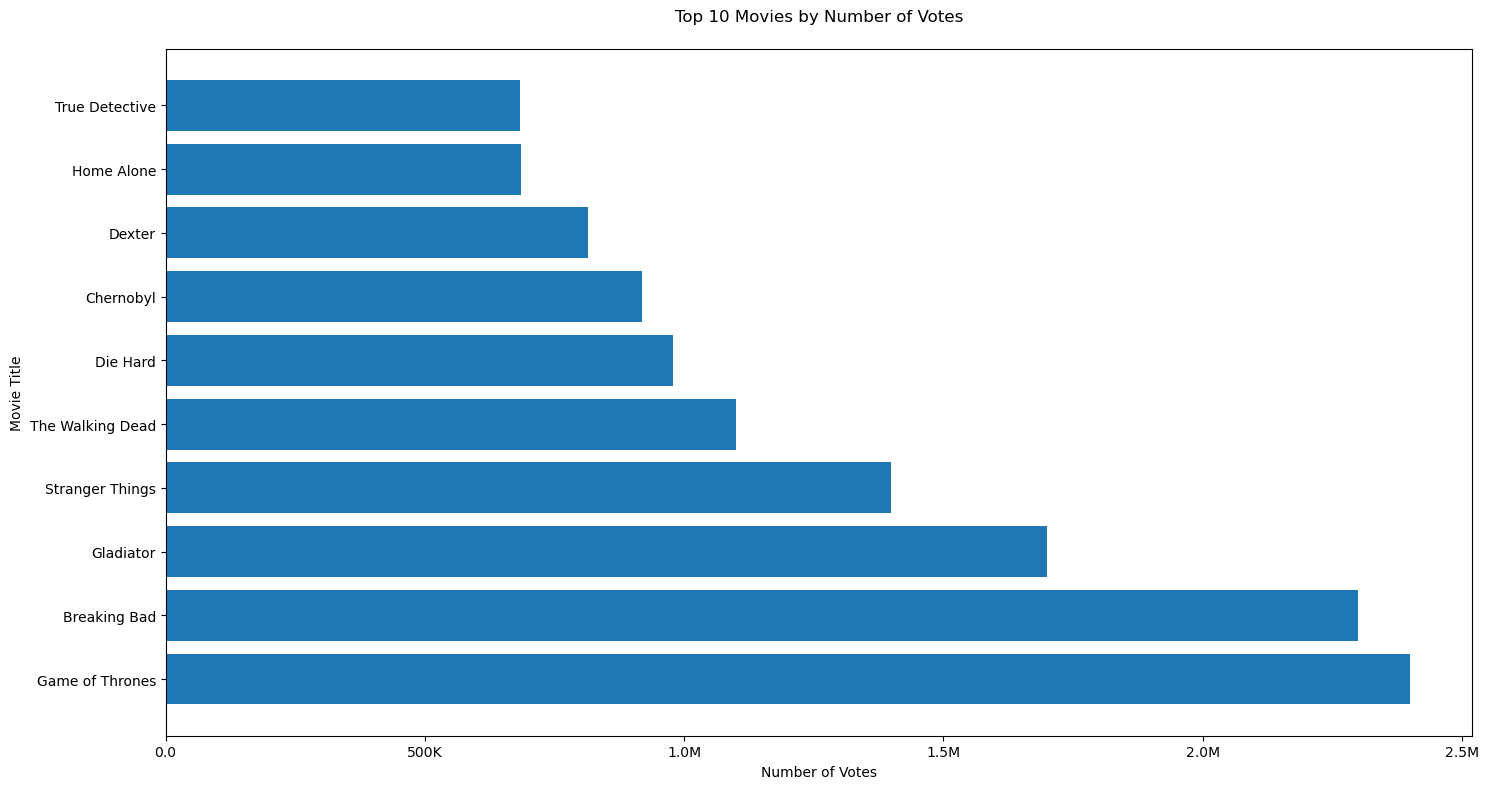

In [122]:
# 1. Top 10 Movies by Vote Count with Video Links
plt.figure(figsize=(15, 8))

# Get top 10 movies with their video links
top_10_by_votes = df_clean.nlargest(10, 'votes')[['title', 'votes', 'video_link']]

# Create the bar plot
bars = plt.barh(top_10_by_votes['title'], top_10_by_votes['votes'])
plt.title('Top 10 Movies by Number of Votes', pad=20)
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')

# Format vote numbers for better readability
def format_votes(x, p):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    return str(x)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_votes))

# Store video links for later use in Streamlit
video_links = dict(zip(top_10_by_votes['title'], top_10_by_votes['video_link']))

# Print video links for verification (you can remove this in production)
print("\nVideo links for top 10 movies:")
for title, link in video_links.items():
    print(f"{title}: {link}")

plt.tight_layout()
plt.show()

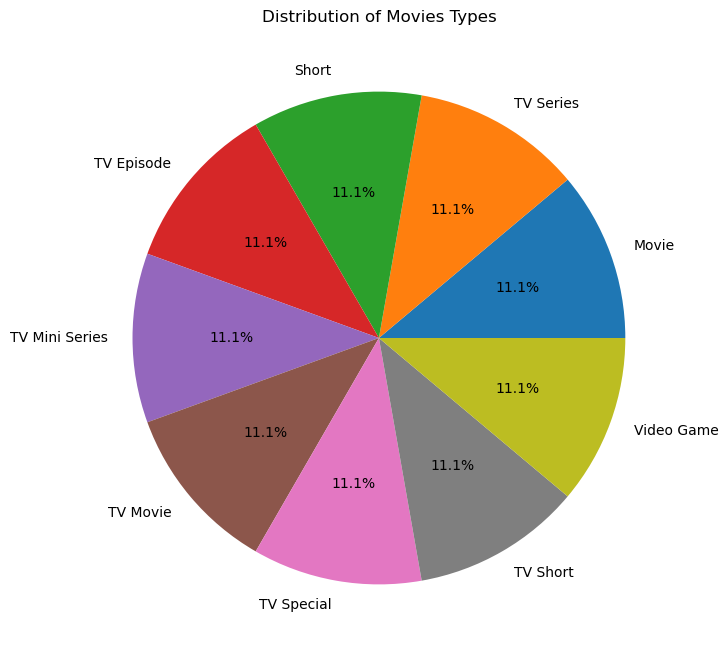

In [117]:
# 2 Movie Count by Type
movie_types = df_clean['title_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(movie_types, labels=movie_types.index, autopct='%1.1f%%')
plt.title('Distribution of Movies Types')
plt.show()

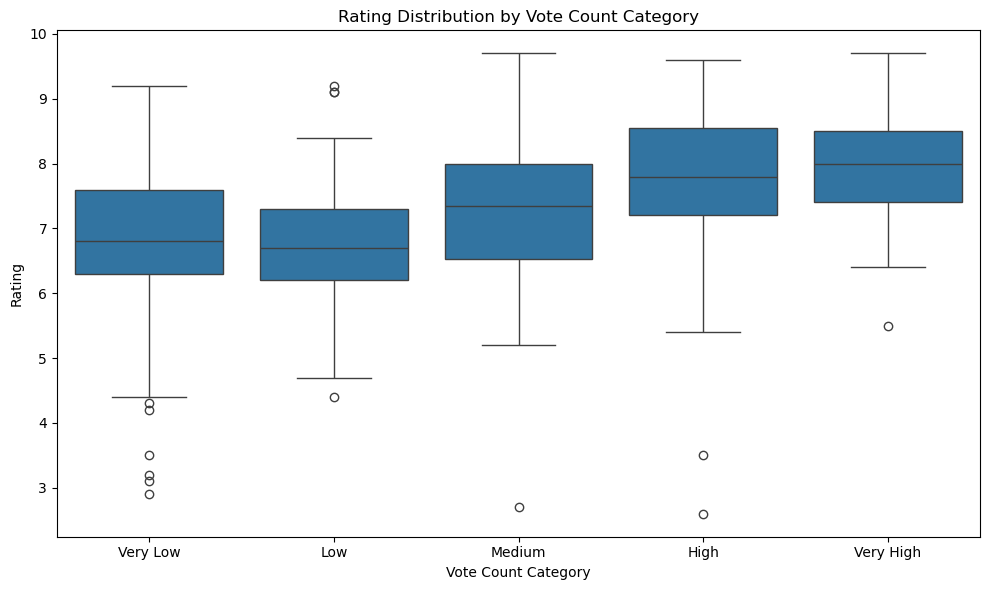

In [107]:
# 3 Rating Distribution by Vote Count Category
df_clean['vote_category'] = pd.qcut(df_clean['votes'], 
                                  q=5, 
                                  labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='vote_category', y='rating')
plt.title('Rating Distribution by Vote Count Category')
plt.xlabel('Vote Count Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

## 3) Create a Complex Query Visualization

### Create OLAP Table

In [85]:
# Create Dimension Tables
dim_movie = df_clean[['title', 'title_type', 'release_year']].copy()
dim_movie['movie_id'] = range(1, len(dim_movie) +1)

# Create a Genre Bridge Table (for many-to-many relationaship)
genre_columns = [col for col in df_clean.columns if col.startswith('genre_')]
genre_bridge = []

for movie_id in range(1, len(df_clean) + 1):
    movie_genres = df_clean.iloc[movie_id-1][genre_columns]
    for genre_col in genre_columns:
        if movie_genres[genre_col] == 1:
            genre_name = genre_col.replace('genre_', '').replace('_','').title()
            genre_bridge.append({
                'movie_id': movie_id,
                'genre': genre_name
            })

dim_genre_bridge = pd.DataFrame(genre_bridge)

# Create a Fact Table
fact_movie_ratings = pd.DataFrame({
    'movie_id': range(1, len(df_clean) +1),
    'rating': df_clean['rating'],
    'votes': df_clean['votes'],
    'rank': df_clean['rank']
})


### Visualization

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



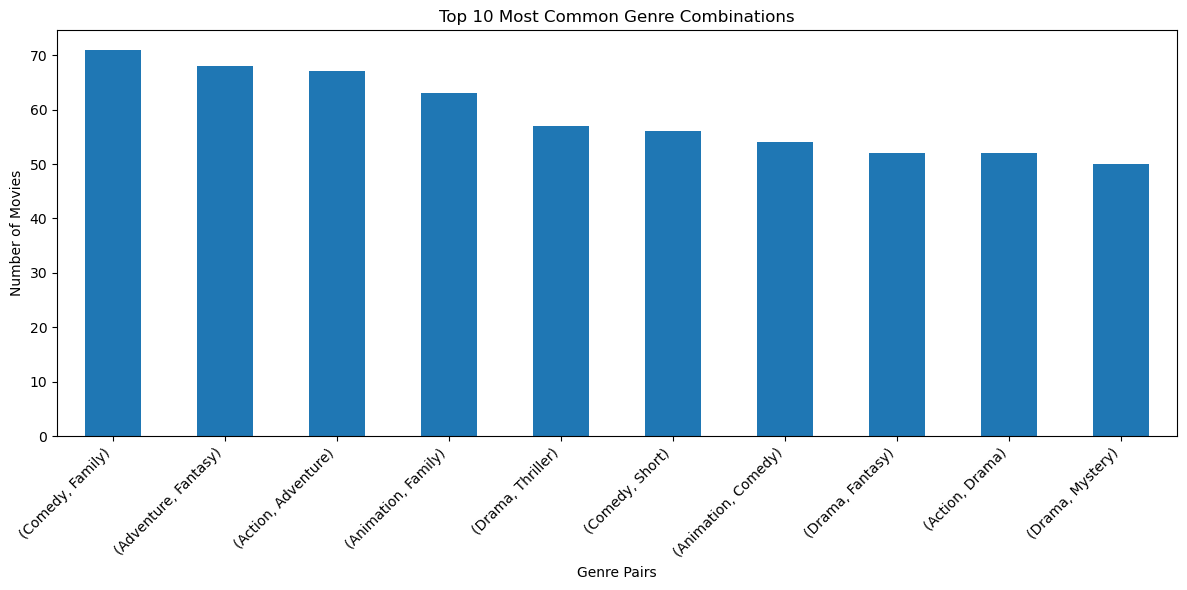

In [110]:
# 1. Genre Combination Analysis
# This shows which genres frequently appear togetherG
genre_combinations = []
movies_with_genres = dim_genre_bridge.groupby('movie_id')['genre'].agg(list).reset_index()

for _, row in movies_with_genres.iterrows():
    genres = row['genre']
    if len(genres) >= 2:  # Only consider movies with at least 2 genres
        for i in range(len(genres)):
            for j in range(i + 1, len(genres)):
                genre_combinations.append(tuple(sorted([genres[i], genres[j]])))

genre_pair_counts = pd.Series(genre_combinations).value_counts().head(10)

plt.figure(figsize=(12, 6))
genre_pair_counts.plot(kind='bar')
plt.title('Top 10 Most Common Genre Combinations')
plt.xlabel('Genre Pairs')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

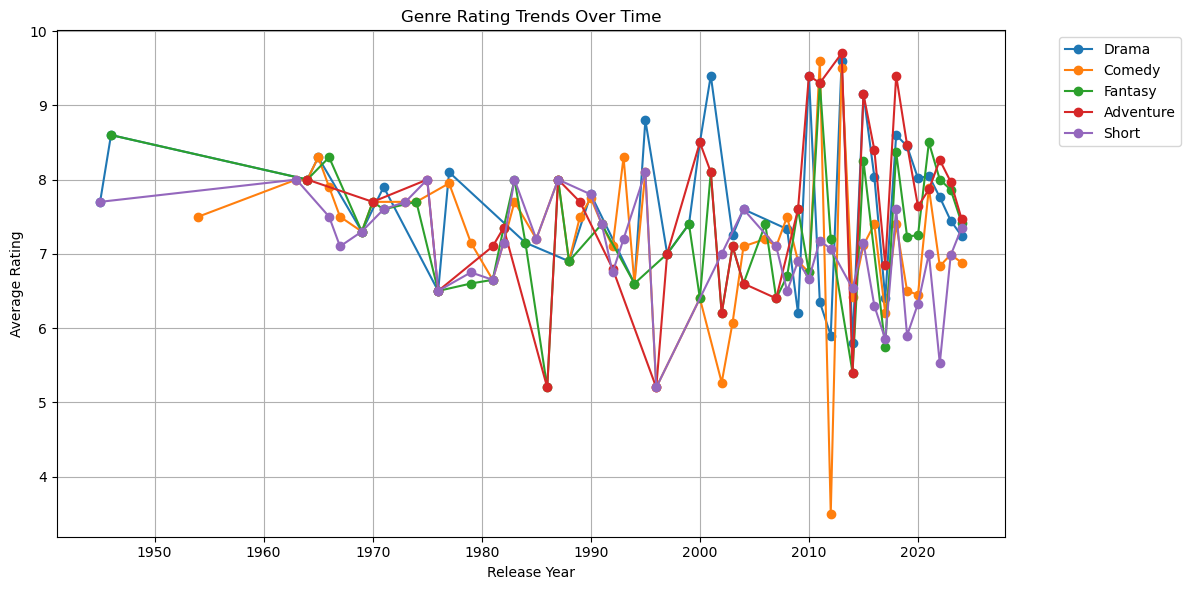

In [111]:
# 2  . Genre Performance Over Time
# Join tables to get comprehensive view
genre_performance = pd.merge(
    dim_genre_bridge,
    fact_movie_ratings,
    on='movie_id'
).merge(
    dim_movie,
    on='movie_id'
)

# Calculate average rating by genre and year
genre_yearly = genre_performance.groupby(['genre', 'release_year'])['rating'].mean().reset_index()

# Plot for top 5 genres
top_genres = genre_performance['genre'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for genre in top_genres:
    genre_data = genre_yearly[genre_yearly['genre'] == genre]
    plt.plot(genre_data['release_year'], genre_data['rating'], label=genre, marker='o')

plt.title('Genre Rating Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



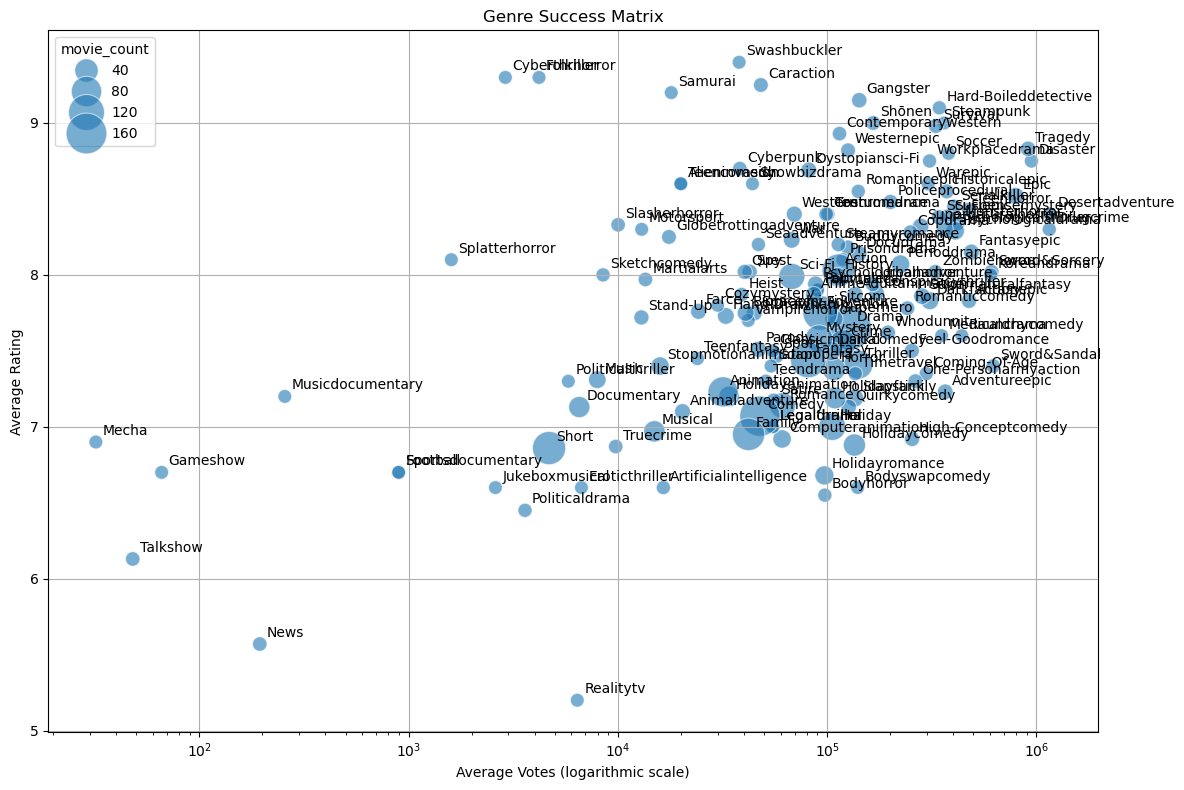

In [108]:
# 3. Genre Success Matrix
# Create a heatmap showing correlation between genre, votes, and ratings
genre_metrics = genre_performance.groupby('genre').agg({
    'rating': ['mean', 'count'],
    'votes': 'mean'
}).round(2)

genre_metrics.columns = ['avg_rating', 'movie_count', 'avg_votes']
genre_metrics = genre_metrics.sort_values('avg_votes', ascending=False)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=genre_metrics, 
                x='avg_votes', 
                y='avg_rating', 
                size='movie_count',
                sizes=(100, 1000),
                alpha=0.6)

# Annotate points with genre names
for idx, row in genre_metrics.iterrows():
    plt.annotate(idx, 
                (row['avg_votes'], row['avg_rating']),
                xytext=(5, 5), 
                textcoords='offset points')

plt.title('Genre Success Matrix')
plt.xlabel('Average Votes (logarithmic scale)')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()



In [109]:
# 4. Movie Type Performance Analysis
type_performance = pd.merge(
    fact_movie_ratings,
    dim_movie,
    on='movie_id'
).groupby('title_type').agg({
    'rating': ['mean', 'std', 'count'],
    'votes': ['mean', 'sum']
}).round(2)

# Format for display
print("\nPerformance by Movie Type:")
print(type_performance)


Performance by Movie Type:
               rating                  votes            
                 mean   std count       mean         sum
title_type                                              
Movie            7.03  0.83    49  186732.65   9149900.0
Short            6.67  1.17    49    8261.61    404819.0
TV Episode       6.76  0.99    39     270.10     10534.0
TV Mini Series   7.59  0.97    48  109872.92   5273900.0
TV Movie         6.50  1.26    50    8398.36    419918.0
TV Series        8.05  0.79    50  304446.00  15222300.0
TV Short         7.16  0.99    50    3358.66    167933.0
TV Special       6.99  1.19    49    6945.33    340321.0
Video Game       8.74  0.90    48   18011.15    864535.0


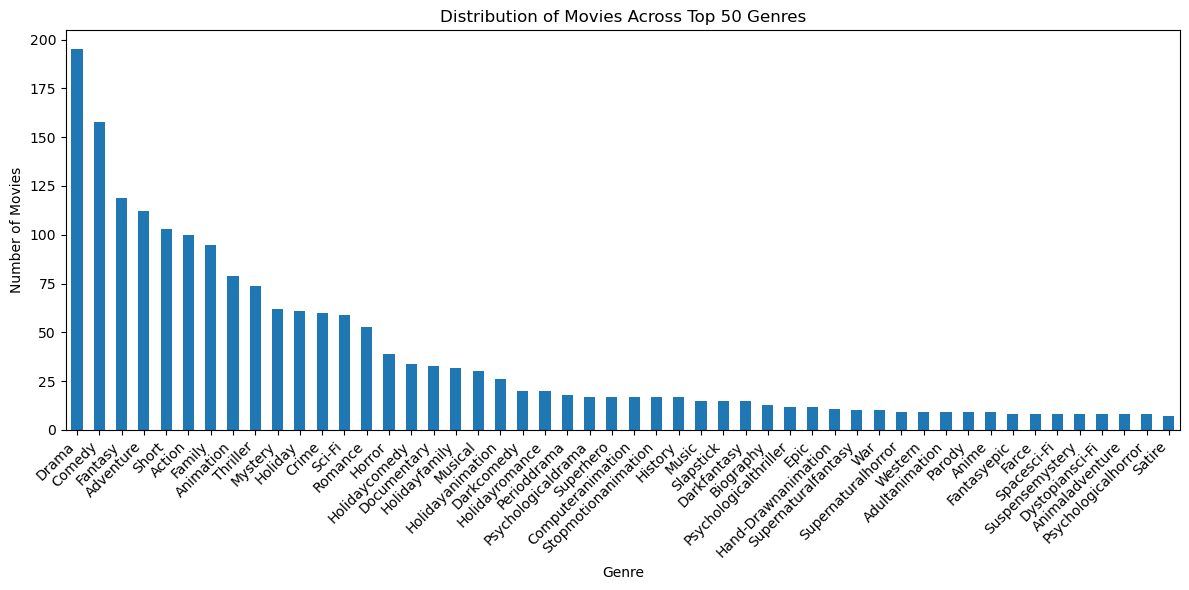

In [112]:
# 5. Genre Distribution Analysis
genre_counts = dim_genre_bridge['genre'].value_counts().head(50)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movies Across Top 50 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

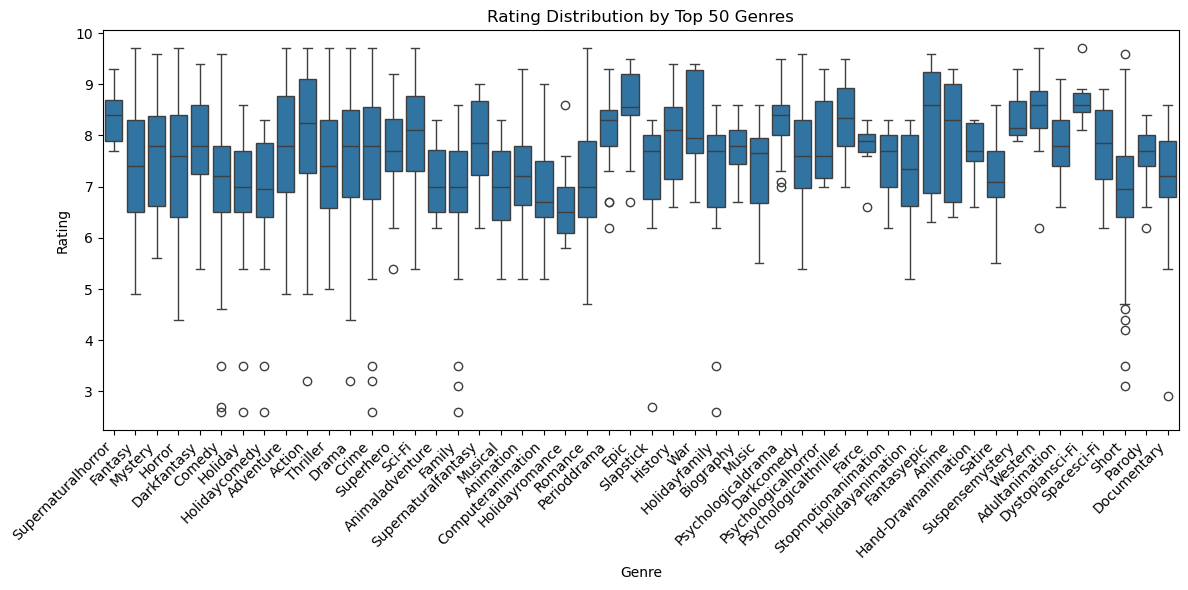

In [113]:
# 6. Rating distribution visualization
top_50_genres = dim_genre_bridge['genre'].value_counts().head(50).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.merge(
    fact_movie_ratings,
    dim_genre_bridge[dim_genre_bridge['genre'].isin(top_50_genres)],
    on='movie_id'
), x='genre', y='rating')

plt.title('Rating Distribution by Top 50 Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


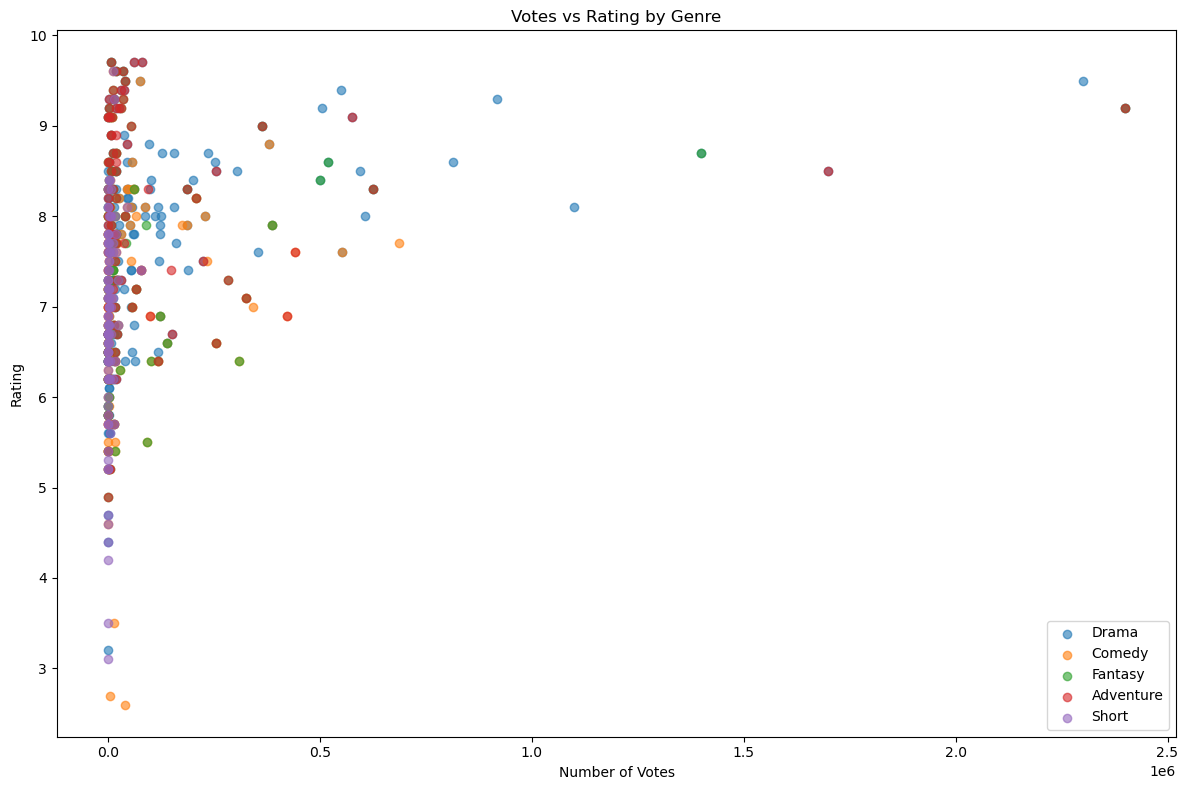

In [114]:
# 7. Votes vs Rating Scatter Plot with Genre
plt.figure(figsize=(12, 8))
for genre in top_genres:
    genre_movies = dim_genre_bridge[dim_genre_bridge['genre'] == genre]['movie_id']
    genre_data = fact_movie_ratings[fact_movie_ratings['movie_id'].isin(genre_movies)]
    plt.scatter(genre_data['votes'], genre_data['rating'], alpha=0.6, label=genre)

plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Votes vs Rating by Genre')
plt.legend()
plt.tight_layout()
plt.show()